In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)

In [2]:
df = pd.read_csv("insurance.csv") # load data

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df['sex'] = df['sex'].map({'male' : 1,
                          'female' : 0})

df['smoker'] = df['smoker'].map({'yes' : 1,
                                'no' : 0})

def onehotencoder(region):
    # Initialize a dictionary for one-hot encoding
    encoding = {
        'southeast': [1, 0, 0, 0],
        'southwest': [0, 1, 0, 0],
        'northwest': [0, 0, 1, 0],
        'northeast': [0, 0, 0, 1]
    }
    return encoding.get(region, [0, 0, 0, 0])  # Default to all zeros if region not found

df[['southeast', 'southwest', 'northwest', 'northeast']] = df['region'].apply(onehotencoder).apply(pd.Series)
df.drop('region', axis=1, inplace=True) # useless now

In [8]:
df.head() # after one hot encoding, binary encoding

,age,sex,bmi,children,smoker,charges,southeast,southwest,northwest,northeast
0,19,0,27.900,0,1,16884.92400,0,1,0,0
1,18,1,33.770,1,0,1725.55230,1,0,0,0
2,28,1,33.000,3,0,4449.46200,1,0,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0


In [9]:
# Normalizing the data using
def normalize(data):
    numeric_data = data.select_dtypes(include=[np.number])
    mu = numeric_data.mean()
    sigma = numeric_data.std()
    normalized_data = (numeric_data - mu) / sigma
    return normalized_data

In [10]:
norm_df = normalize(df)

In [11]:
norm_df.head()

,age,sex,bmi,children,smoker,charges,southeast,southwest,northwest,northeast
0,-1.438227,-1.010141,-0.453151,-0.908274,1.969850,0.298472,-0.611095,1.764821,-0.566206,-0.565056
1,-1.509401,0.989221,0.509431,-0.078738,-0.507273,-0.953333,1.635183,-0.566206,-0.566206,-0.565056
2,-0.797655,0.989221,0.383164,1.580335,-0.507273,-0.728402,1.635183,-0.566206,-0.566206,-0.565056
3,-0.441782,0.989221,-1.305043,-0.908274,-0.507273,0.719574,-0.611095,-0.566206,1.764821,-0.565056
4,-0.512957,0.989221,-0.292447,-0.908274,-0.507273,-0.776512,-0.611095,-0.566206,1.764821,-0.565056


In [12]:
# Data is preprocessed time to create train and test sets
def train_test_split(data, test_size=0.33, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Shuffle the data
    shuffled_indices = np.random.permutation(len(data))
    
    # Split the indices
    test_set_size = int(len(data) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    # Create train and test sets
    train_set = data.iloc[train_indices]
    test_set = data.iloc[test_indices]
    
    return train_set, test_set

In [13]:
train, test = train_test_split(df, test_size=0.20, random_seed=42)

In [14]:
train.shape, test.shape

((1071, 10), (267, 10))

In [15]:
train.head()

,age,sex,bmi,children,smoker,charges,southeast,southwest,northwest,northeast
846,51,0,34.20,1,0,9872.70100,0,1,0,0
560,46,0,19.95,2,0,9193.83850,0,0,1,0
1285,47,0,24.32,0,0,8534.67180,0,0,0,1
1142,52,0,24.86,0,0,27117.99378,1,0,0,0
969,39,0,34.32,5,0,8596.82780,1,0,0,0


In [16]:
train_X, train_y = train.drop('charges', axis=1).copy(), train['charges'].copy()
test_X, test_y = test.drop('charges', axis=1).copy(), test['charges'].copy()

In [17]:
train_X.shape

(1071, 9)

# Time find the θ theta using the normal equation
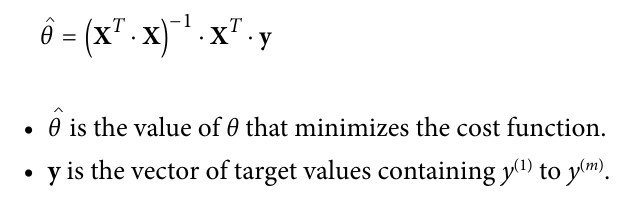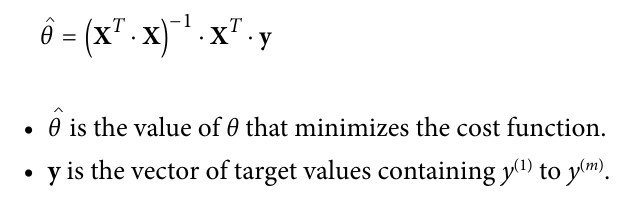

In [18]:
theta_best = np.linalg.inv(train_X.T @ train_X) @ train_X.T @ train_y

In [19]:
theta_best

0      256.861919
1      -14.137135
2      336.883992
3      425.477751
4    23653.021096
5   -12580.667778
6   -12742.084547
7   -12294.191538
8   -11923.676766
dtype: float64

In [20]:
# Time to make some predictions
for x in range(0, 10):
    print(f"Actual Value : {test_y.iloc[x]} Predicted Value : {test_X.iloc[x].values @ theta_best}")

Actual Value : 9095.06825 Predicted Value : 8967.119589980313
Actual Value : 5272.1758 Predicted Value : 7066.0949873026
Actual Value : 29330.98315 Predicted Value : 36855.11849925424
Actual Value : 9301.89355 Predicted Value : 9456.831228105588
Actual Value : 33750.2918 Predicted Value : 26978.40590999091
Actual Value : 4536.259 Predicted Value : 10854.884574203417
Actual Value : 2117.33885 Predicted Value : 171.12800409298507
Actual Value : 14210.53595 Predicted Value : 16900.421861059524
Actual Value : 3732.6251 Predicted Value : 1093.1811882127004
Actual Value : 10264.4421 Predicted Value : 11219.540341713848


In [21]:
Prediction = list()
def make_prediction(X):
    for i in range(0, len(X)):
        Prediction.append(X.iloc[i].values @ theta_best)

In [22]:
make_prediction(test_X)

In [23]:
len(Prediction)

267

In [24]:
mse = np.mean((Prediction - test_y) ** 2)
rmse = np.sqrt(mse)

In [25]:
print(f"RMSE : {rmse} MSE : {mse}")

RMSE : 5805.154658498209 MSE : 33699820.60908345


Okay now let's compare our performance with scikit-learn's linear regression

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [27]:
pred_y = reg.predict(test_X)
mse = np.mean((pred_y-test_y) ** 2)
rmse = np.sqrt(mse)

In [28]:
print(f"RMSE : {rmse} MSE : {mse}")

RMSE : 5805.154658498214 MSE : 33699820.60908352
